In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, layers
import tensorflow_hub as hub

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)

flower_images_dict = {
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'roses': list(data_dir.glob('roses/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [47]:
classes = ['roses',
    'daisy',
    'dandelion',
    'sunflowers',
    'tulips']

In [4]:
data_augmentation1 = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(180,180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
  ]
)

In [10]:
X, y = [], []

for flower_name, images  in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

X = np.array(X)
y = np.array(y)


In [40]:
new_X = data_augmentation1(X)
new_X = new_X.numpy().astype("uint8")
new_X[:5]

array([[[[  4,  18,  24],
         [  3,  17,  23],
         [  3,  17,  23],
         ...,
         [  4,  16,  25],
         [  4,  15,  24],
         [  4,  13,  22]],

        [[  1,  14,  20],
         [  0,  13,  19],
         [  0,  13,  20],
         ...,
         [  7,  19,  29],
         [  6,  18,  27],
         [  5,  16,  24]],

        [[  0,  12,  16],
         [  0,  11,  16],
         [  0,  10,  17],
         ...,
         [  9,  22,  31],
         [  8,  20,  29],
         [  6,  18,  25]],

        ...,

        [[ 41,  39,  41],
         [ 43,  41,  42],
         [ 43,  43,  43],
         ...,
         [149, 153, 160],
         [149, 152, 160],
         [148, 150, 158]],

        [[ 41,  40,  41],
         [ 44,  42,  42],
         [ 45,  43,  43],
         ...,
         [149, 152, 159],
         [145, 148, 156],
         [136, 139, 146]],

        [[ 42,  41,  43],
         [ 44,  42,  44],
         [ 46,  43,  46],
         ...,
         [142, 146, 151],
        

In [41]:
X.shape, new_X.shape

((3670, 180, 180, 3), (3670, 180, 180, 3))

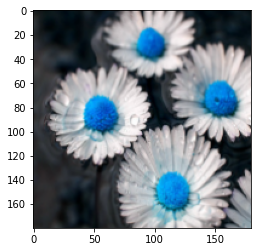

In [17]:
import matplotlib.pyplot as plt

plt.imshow(new_X[0])

Text(0.5, 1.0, 'daisy')

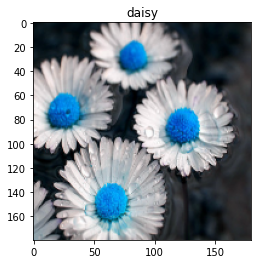

In [48]:
plt.imshow(X[0])
plt.title(classes[y[0]])

In [46]:
up_X = np.concatenate((X,new_X), axis=0)
up_y = np.concatenate((y,y),axis=0)

Text(0.5, 1.0, 'daisy')

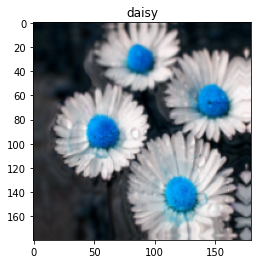

In [52]:
plt.imshow(up_X[3670])
plt.title(classes[up_y[3670]])

In [53]:
data_augmentation2 = keras.Sequential(
  [
    layers.RandomFlip("vertical", input_shape=(180,180,3)),
    layers.RandomRotation(0.4),
    layers.RandomZoom(0.3)
  ]
)

In [54]:
new_X = data_augmentation2(X)
new_X = new_X.numpy().astype("uint8")
new_X[:2]

array([[[[244, 240, 240],
         [250, 247, 247],
         [250, 248, 248],
         ...,
         [ 37,  34,  36],
         [ 39,  36,  38],
         [ 40,  38,  40]],

        [[232, 229, 231],
         [239, 237, 239],
         [246, 247, 247],
         ...,
         [ 39,  35,  36],
         [ 39,  36,  38],
         [ 41,  38,  40]],

        [[213, 211, 213],
         [209, 209, 211],
         [225, 226, 228],
         ...,
         [ 40,  35,  37],
         [ 41,  37,  39],
         [ 42,  39,  41]],

        ...,

        [[199, 191, 191],
         [188, 178, 178],
         [196, 186, 188],
         ...,
         [  7,  16,  20],
         [ 10,  19,  23],
         [ 13,  21,  25]],

        [[217, 210, 211],
         [204, 195, 196],
         [191, 181, 181],
         ...,
         [  7,  14,  19],
         [ 10,  16,  21],
         [ 14,  20,  25]],

        [[230, 223, 223],
         [219, 212, 212],
         [205, 195, 195],
         ...,
         [  6,  12,  17],
        

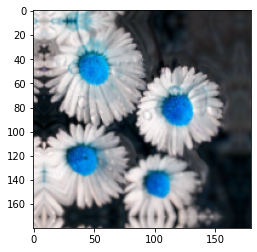

In [55]:
plt.imshow(new_X[0])

In [56]:
new_X.shape, up_X.shape

((3670, 180, 180, 3), (7340, 180, 180, 3))

In [57]:
up_X = np.concatenate((up_X,new_X), axis=0)
up_y = np.concatenate((up_y,y),axis=0)

Text(0.5, 1.0, 'daisy')

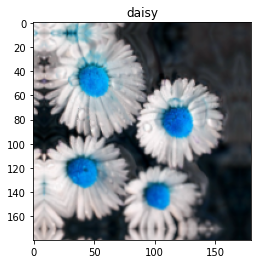

In [58]:
plt.imshow(up_X[7340])
plt.title(classes[up_y[7340]])